In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [93]:
df = pd.read_csv('infosys.csv', parse_dates=['Date'], infer_datetime_format=True, index_col='Date', dayfirst=True)

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5787 entries, 2000-01-03 to 2022-12-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       5787 non-null   float64
 1   High       5787 non-null   float64
 2   Low        5787 non-null   float64
 3   Close      5787 non-null   float64
 4   Adj Close  5787 non-null   float64
 5   Volume     5787 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 316.5 KB


In [97]:
df.head(10)

Open      High       Low     Close  Adj Close   Volume
Date                                                                  
2000-01-03  5.890625  5.906250  5.462891  5.767578   3.861567  5331200
2000-01-04  5.641113  6.281250  5.570313  5.812500   3.891644  5056000
2000-01-05  5.476563  5.855469  5.328125  5.765625   3.860260  6054400
2000-01-06  5.598633  5.703125  5.156250  5.156250   3.452265  4704000
2000-01-07  4.945313  5.515625  4.703125  5.515625   3.692876  7884800
2000-01-10  5.812500  5.847656  5.546875  5.593750   3.745184  3532800
2000-01-11  5.441406  5.442383  5.149414  5.265625   3.525495  8512000
2000-01-12  5.375000  5.546875  4.906250  5.171875   3.462727  3968000
2000-01-13  5.343750  5.343750  4.875000  4.968750   3.326727  2560000
2000-01-14  5.100586  5.269531  4.644531  4.658203   3.118808  7091200

In [129]:
df_new=df.iloc[:: 7].filter(['Open'])
df_new.count()

Open    827
dtype: int64

In [130]:
df_new.head()

Open
Date                
2000-01-03  5.890625
2000-01-12  5.375000
2000-01-24  4.796875
2000-02-02  5.109375
2000-02-11  8.351563

<AxesSubplot:xlabel='Date'>

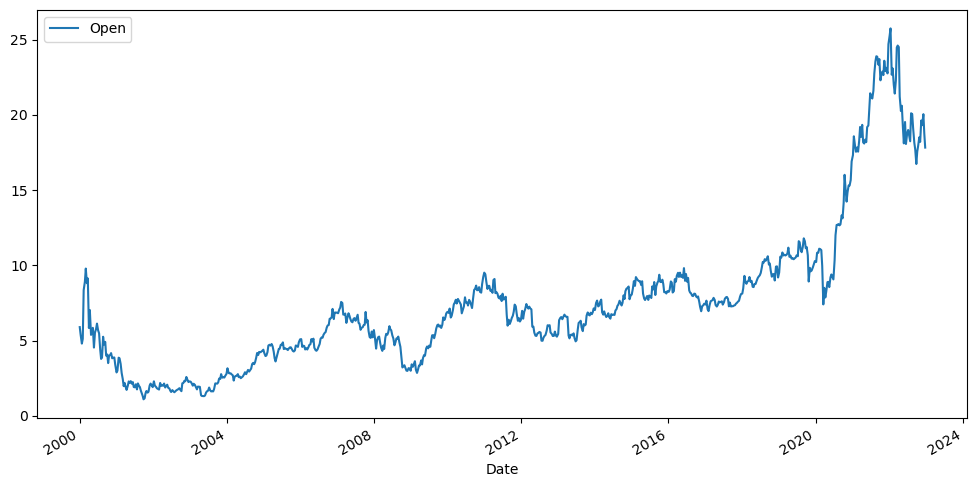

In [127]:
df_new.plot(figsize=(12,6))

In [128]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
#scaling=np.array(df_new)
scaling=scaler.fit_transform(df_new)
scaling

array([[0.19461877],
       [0.17369747],
       [0.15024026],
       [0.16291984],
       [0.29447044],
       [0.31697667],
       [0.35247948],
       [0.31301431],
       [0.32585237],
       [0.19224134],
       [0.24074074],
       [0.17369747],
       [0.18602044],
       [0.19271684],
       [0.13946262],
       [0.17987878],
       [0.18962618],
       [0.20404921],
       [0.18621856],
       [0.17781836],
       [0.13383606],
       [0.10887316],
       [0.11283552],
       [0.16862564],
       [0.14770435],
       [0.1548366 ],
       [0.11774886],
       [0.12076027],
       [0.09762003],
       [0.11798659],
       [0.1191753 ],
       [0.12456414],
       [0.11061661],
       [0.11220154],
       [0.11283552],
       [0.09373691],
       [0.07241936],
       [0.07701574],
       [0.11220154],
       [0.11053733],
       [0.09540112],
       [0.07099292],
       [0.05443023],
       [0.03549011],
       [0.04420733],
       [0.03311268],
       [0.02535915],
       [0.036

In [131]:
train_len=round(len(scaling)*0.7)
train_len
training_data=scaling[:train_len]
testing_data=scaling[train_len:]

In [132]:

def preprocess(num_steps,data):
    # Prepare the training data
    X, y = [], []
    for i in range(num_steps, len(data)):
        X.append(data[i - num_steps:i])
        y.append(data[i])
    return np.array(X), np.array(y)


In [143]:

step_size=10
x_train,y_train=preprocess(step_size,training_data)
x_test,y_test=preprocess(step_size,testing_data)
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((569, 10, 1), (569, 1), (238, 10, 1), (238, 1))

In [144]:
import tensorflow as tf
from keras.layers import Dense,LSTM
from keras.models import Sequential
model2 = Sequential()
model2.add(LSTM(units=64, activation='tanh', input_shape=(step_size, 1),return_sequences=True))
model2.add(LSTM(units=20,activation='tanh',return_sequences=True))
model2.add(LSTM(units=10,activation='tanh',return_sequences=False))
model2.add(Dense(units=5,activation='relu'))
model2.add(Dense(units=1))
model2.compile(optimizer='adam', loss='mean_squared_error',metrics=['mean_absolute_error'])

In [145]:
model2.fit(x_train,y_train,epochs=20)

Epoch 1/20
18/18 [==============================] - 11s 24ms/step - loss: 0.0074 - mean_absolute_error: 0.0660
Epoch 2/20
18/18 [==============================] - 0s 25ms/step - loss: 0.0026 - mean_absolute_error: 0.0424
Epoch 3/20
18/18 [==============================] - 0s 25ms/step - loss: 0.0010 - mean_absolute_error: 0.0256
Epoch 4/20
18/18 [==============================] - 0s 25ms/step - loss: 7.8223e-04 - mean_absolute_error: 0.0223
Epoch 5/20
18/18 [==============================] - 0s 24ms/step - loss: 7.8075e-04 - mean_absolute_error: 0.0222
Epoch 6/20
18/18 [==============================] - 0s 25ms/step - loss: 7.5395e-04 - mean_absolute_error: 0.0219
Epoch 7/20
18/18 [==============================] - 0s 25ms/step - loss: 7.4368e-04 - mean_absolute_error: 0.0217
Epoch 8/20
18/18 [==============================] - 0s 24ms/step - loss: 7.8023e-04 - mean_absolute_error: 0.0224
Epoch 9/20
18/18 [==============================] - 0s 25ms/step - loss: 7.5502e-04 - mean_absolute

8/8 [==============================] - 0s 8ms/step


Text(0.5, 1.0, 'actual vs predict on training data')

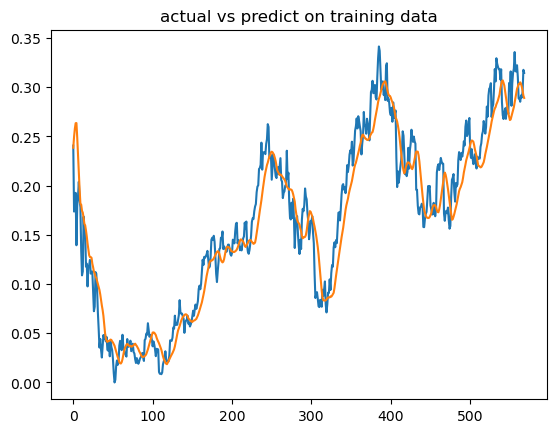

In [146]:
train_predict=model2.predict(x_train)
test_predict=model2.predict(x_test)
plt.plot(y_train)
plt.plot(train_predict)
plt.title("actual vs predict on training data")


Text(0.5, 1.0, 'actual vs predict on testing data')

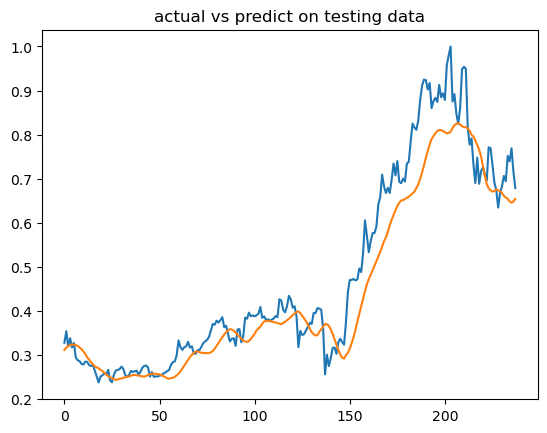

In [147]:
plt.plot(y_test)
plt.plot(test_predict)
plt.title("actual vs predict on testing data")

In [378]:
X_pred2 = []
data2=testing_data[-step_size:,]
for i in range(2):  # Predict for the next 30 days
    X_pred2.append(data2[-step_size:,])
    #print(f'length of X_pred at iteration{i} {X_pred}')
    #print(X_pred)
    pred_input2 = np.array(X_pred2[-1].reshape(1, step_size,1))
    #print("shape of rped_input",pred_input.shape)
    pred2 = model2.predict(pred_input2)
    #print("prediction shape",pred.shape)
    data2 = np.concatenate((data2, pred2), axis=0)
    #print(f'test data at iteration{i} {data2}')


1/1 [==============================] - 0s 32ms/step


In [379]:
original_data2=testing_data[-step_size:,]
predicted_data2=data2[-step_size:,]
print(original_data2.shape)
print(predicted_data2.shape)

(10, 1)
(10, 1)


In [380]:
original_data2=original_data2.reshape(step_size,)
original_data2.shape

(10,)

In [381]:
predicted_data3=np.array(predicted_data2)
predicted_data3
predicted_data3=predicted_data3.reshape(step_size,)
predicted_data3.shape

(10,)

In [382]:
scaler.inverse_transform(original_data2.reshape(-1,1)),scaler.inverse_transform(predicted_data3.reshape(-1,1))

(array([[16.73    ],
        [17.549999],
        [17.93    ],
        [18.5     ],
        [18.200001],
        [19.620001],
        [19.309999],
        [20.040001],
        [18.75    ],
        [17.82    ]]),
 array([[17.93      ],
        [18.5       ],
        [18.200001  ],
        [19.620001  ],
        [19.309999  ],
        [20.040001  ],
        [18.75      ],
        [17.82      ],
        [17.35453687],
        [17.49742476]]))

Text(0.5, 1.0, 'Actual data of previous 5 weeks  and predicted data for the next 5 weeks ')

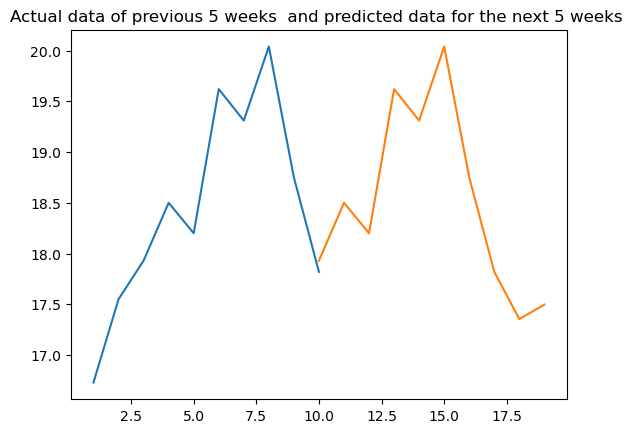

In [383]:

actual=np.arange(1,(step_size+1))
predict=np.arange(step_size,(step_size*2))
plt.plot(actual,scaler.inverse_transform(original_data2.reshape(-1,1)))
plt.plot(predict,scaler.inverse_transform(predicted_data3.reshape(-1,1)))
plt.title("Actual data of previous 5 weeks  and predicted data for the next 5 weeks ")

Text(0.5, 1.0, 'Actual data of previous 12 weeks  and predicted data for the next 2 weeks  and compairirng ')

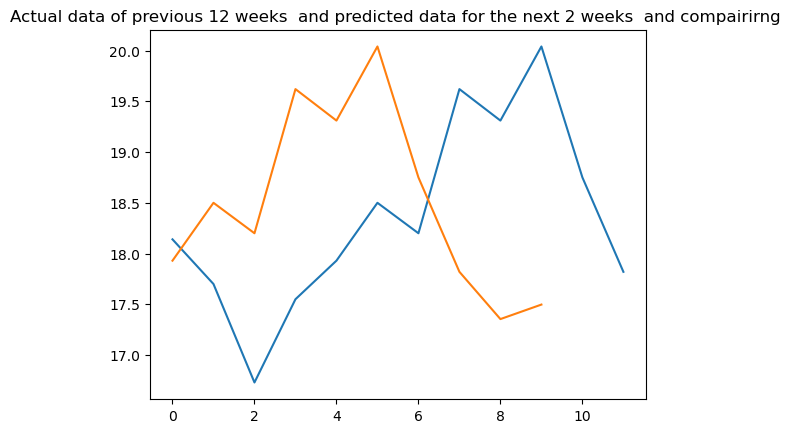

In [304]:

plt.plot(scaler.inverse_transform(testing_data[-12:].reshape(-1,1)))
plt.plot(scaler.inverse_transform(predicted_data3.reshape(-1,1)))
plt.title("Actual data of previous 12 weeks  and predicted data for the next 2 weeks  and compairirng ")

In [291]:
testing_data[-12:],data2[-step_size:,]

(array([[0.6916327 ],
        [0.67377994],
        [0.6344225 ],
        [0.66769366],
        [0.68311207],
        [0.70623961],
        [0.69406726],
        [0.75168325],
        [0.73910503],
        [0.7687246 ],
        [0.71638327],
        [0.67864886]]),
 array([[0.68311207],
        [0.70623961],
        [0.69406726],
        [0.75168325],
        [0.73910503],
        [0.7687246 ],
        [0.71638327],
        [0.67864886],
        [0.65976286],
        [0.66556048]]))

In [292]:
predicted_data3

array([0.68311207, 0.70623961, 0.69406726, 0.75168325, 0.73910503,
       0.7687246 , 0.71638327, 0.67864886, 0.65976286, 0.66556048])